# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | glace bay
Processing Record 3 of Set 1 | amga
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | ust'-ilimsk
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | tadjourah
Processing Record 11 of Set 1 | hereford
Processing Record 12 of Set 1 | ben mehidi
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | amahai
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | amursk
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | fale old settlement
Processing Record 22 of Set 1 | waitangi
Processing 

Processing Record 42 of Set 4 | aleg
Processing Record 43 of Set 4 | labrador city
Processing Record 44 of Set 4 | chonchi
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | arvika
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | conde
Processing Record 49 of Set 4 | jasrasar
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | novyy oskol
Processing Record 2 of Set 5 | papao
Processing Record 3 of Set 5 | jishu
Processing Record 4 of Set 5 | novodvinsk
Processing Record 5 of Set 5 | mirny
Processing Record 6 of Set 5 | leava
Processing Record 7 of Set 5 | san juan de uraba
Processing Record 8 of Set 5 | spanish wells
Processing Record 9 of Set 5 | acatic
Processing Record 10 of Set 5 | rusape
Processing Record 11 of Set 5 | kerikeri
Processing Record 12 of Set 5 | tralee
Processing Record 13 of Set 5 | daultala
Processing Record 14 of Set 5 | kavieng
Processing Record 15 of Set 5 | borujen
Processing Record 16 of S

Processing Record 35 of Set 8 | maumere
Processing Record 36 of Set 8 | san antonio de pale
Processing Record 37 of Set 8 | kyakhta
Processing Record 38 of Set 8 | dhulikhel
Processing Record 39 of Set 8 | darwin
Processing Record 40 of Set 8 | juneau
Processing Record 41 of Set 8 | manchester
Processing Record 42 of Set 8 | bocana de paiwas
Processing Record 43 of Set 8 | pervomayskiy
Processing Record 44 of Set 8 | albertina
Processing Record 45 of Set 8 | sawakin
Processing Record 46 of Set 8 | vikarabad
Processing Record 47 of Set 8 | sallisaw
Processing Record 48 of Set 8 | mili
Processing Record 49 of Set 8 | robore
Processing Record 0 of Set 9 | argo
Processing Record 1 of Set 9 | pacific grove
Processing Record 2 of Set 9 | mumford
Processing Record 3 of Set 9 | shihezi
Processing Record 4 of Set 9 | vila franca do campo
Processing Record 5 of Set 9 | vorotynets
Processing Record 6 of Set 9 | cargados carajos
City not found. Skipping...
Processing Record 7 of Set 9 | birjand
Pr

Processing Record 23 of Set 12 | imperatriz
Processing Record 24 of Set 12 | hayma'
City not found. Skipping...
Processing Record 25 of Set 12 | nizao
Processing Record 26 of Set 12 | sao gabriel da cachoeira
Processing Record 27 of Set 12 | tara
Processing Record 28 of Set 12 | kulhudhuffushi
Processing Record 29 of Set 12 | sitges
Processing Record 30 of Set 12 | ashland
Processing Record 31 of Set 12 | karoi
Processing Record 32 of Set 12 | acajutla
Processing Record 33 of Set 12 | lakatoro
Processing Record 34 of Set 12 | iwanai
Processing Record 35 of Set 12 | jiutai
Processing Record 36 of Set 12 | ulladulla
Processing Record 37 of Set 12 | swift current
Processing Record 38 of Set 12 | posto fiscal rolim de moura
Processing Record 39 of Set 12 | spring creek
Processing Record 40 of Set 12 | arkhangel'sk
Processing Record 41 of Set 12 | radcliff
Processing Record 42 of Set 12 | collie
Processing Record 43 of Set 12 | selkirk
Processing Record 44 of Set 12 | port shepstone
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [8]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
488,jijel,36.8205,5.7667,23.89,40,49,3.42,DZ,1682716144
280,prado,-17.3411,-39.2208,25.64,84,0,3.59,BR,1682716113
93,atafu village,-8.5421,-172.5159,29.23,75,47,7.49,TK,1682716086
131,allapalli,19.4167,80.0667,26.33,64,72,0.78,IN,1682716091
382,juneau,58.3019,-134.4197,8.56,91,100,4.12,US,1682716015
449,berezovo,63.9381,65.0419,-8.47,88,19,3.52,RU,1682716138
157,al ghayzah,16.2079,52.1760,28.54,76,56,3.21,YE,1682716095
234,georgetown,5.4112,100.3354,25.96,94,20,0.00,MY,1682716018
430,gasa,31.5000,34.4667,13.27,62,0,6.15,PS,1682716080
520,tamanrasset,22.7850,5.5228,26.95,16,40,3.09,DZ,1682716149


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
575,port shepstone,-30.7414,30.4550,20.80,86,100,1.95,ZA,1682716026
571,arkhangel'sk,64.5401,40.5433,2.06,59,0,7.00,RU,1682716159
336,sunne,59.8376,13.1430,5.18,68,99,0.76,SE,1682716120
384,bocana de paiwas,12.7857,-85.1227,37.69,24,97,2.42,NI,1682716129
305,altusried,47.8000,10.2167,12.32,92,100,2.48,DE,1682716116
538,kissidougou,9.1848,-10.0999,26.63,62,93,3.25,GN,1682716153
383,manchester,53.4809,-2.2374,12.13,79,39,1.03,GB,1682715591
169,mont-dore,-22.2833,166.5833,23.89,99,87,4.29,NC,1682716097
526,phan thiet,10.9333,108.1000,24.91,84,58,3.17,VN,1682716151


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude verseHumidity " + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

TypeError: bad operand type for unary +: 'str'

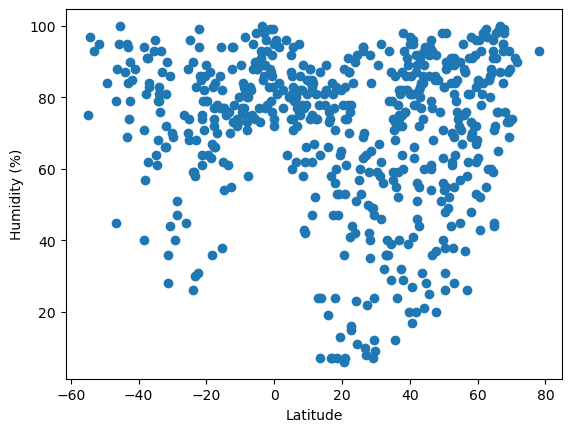

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity" + + time.strftime("%x"))
plt.grid(True)
# Save the figure


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

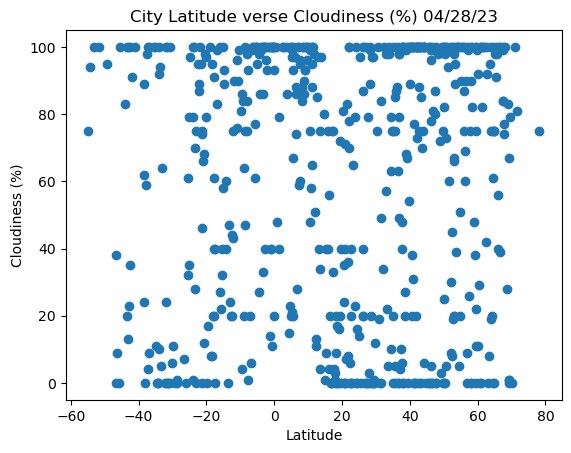

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude verse Cloudiness (%) "  + time.strftime("%x"))
# Save the figure


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

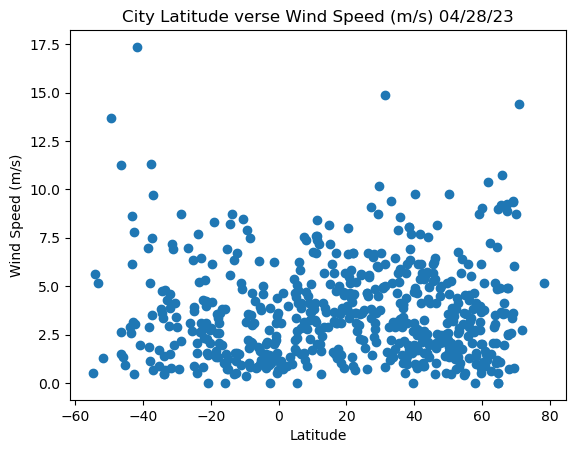

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude verse Wind Speed (m/s) "  + time.strftime("%x"))
# Save the figure


# Show plot
plt.show()



## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):

    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
 
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round((rvalue **2),5)}")
    
    


    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
 
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - Linear Regression of {y_label} verse {x_label} "  + time.strftime("%x"))
    plt.annotate(line_eq, location, color="red")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,glace bay,46.1969,-59.9570,6.82,79,5,5.36,CA,1682716071
2,amga,60.8953,131.9608,-0.61,93,100,0.90,RU,1682716072
4,yellowknife,62.4560,-114.3525,6.45,55,42,7.22,CA,1682716059
6,ilulissat,69.2167,-51.1000,0.01,69,0,3.60,GL,1682716072
7,ust'-ilimsk,58.0006,102.6619,1.75,97,100,2.72,RU,1682716072


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.48,97,94,5.61,GS,1682716071
3,invercargill,-46.4000,168.3500,7.85,88,9,2.65,NZ,1682716072
5,hithadhoo,-0.6000,73.0833,28.42,76,100,3.48,MV,1682715841
8,adamstown,-25.0660,-130.1015,24.52,68,79,3.70,PN,1682716073
12,punta arenas,-53.1500,-70.9167,4.06,93,100,5.14,CL,1682715921


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: 0.73069


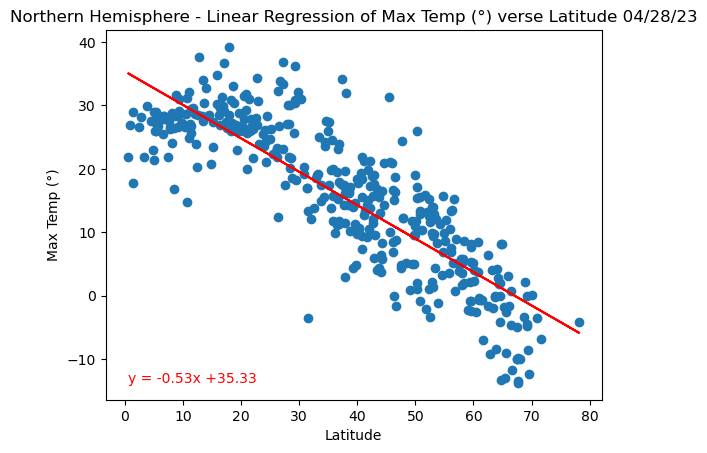

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°)", "Northern", (x_values.min(), y_values.min()))


plt.show()

 The rvalue is: 0.4914


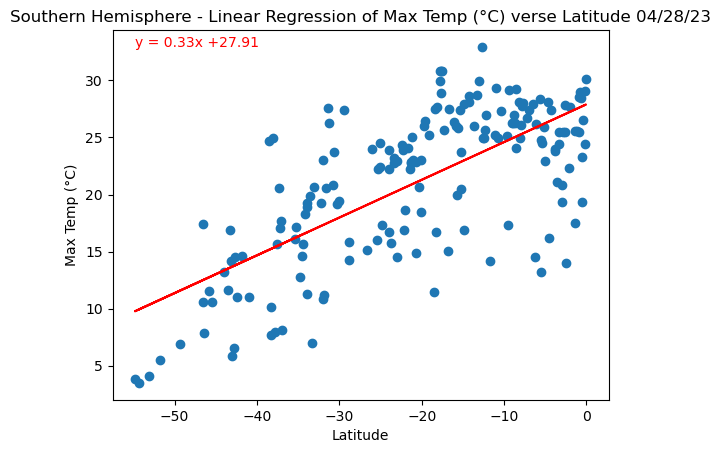

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°C)", "Southern", (x_values.min(), y_values.max()))


plt.show()


**Discussion about the linear relationship: 

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.01868


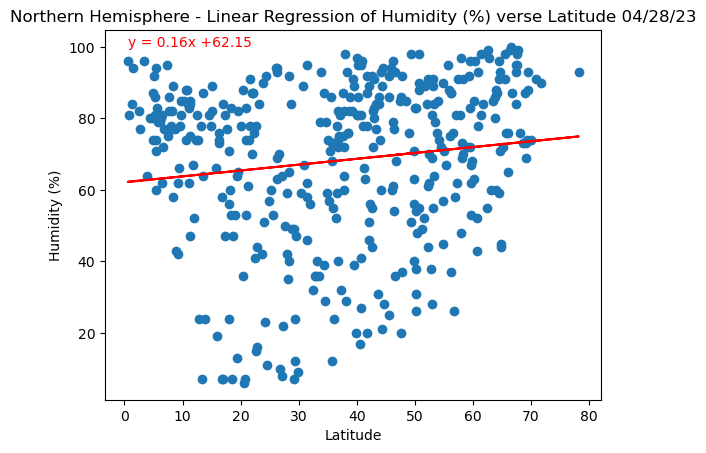

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (x_values.min(), y_values.max()))



plt.show()

 The rvalue is: 0.0173


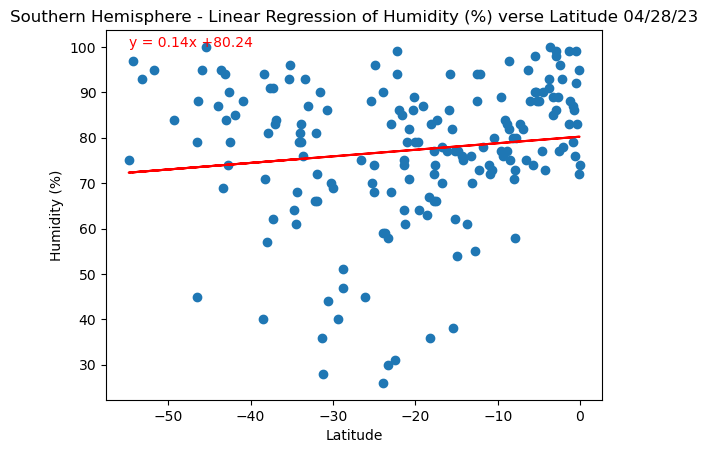

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (x_values.min(), y_values.max()))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.00237


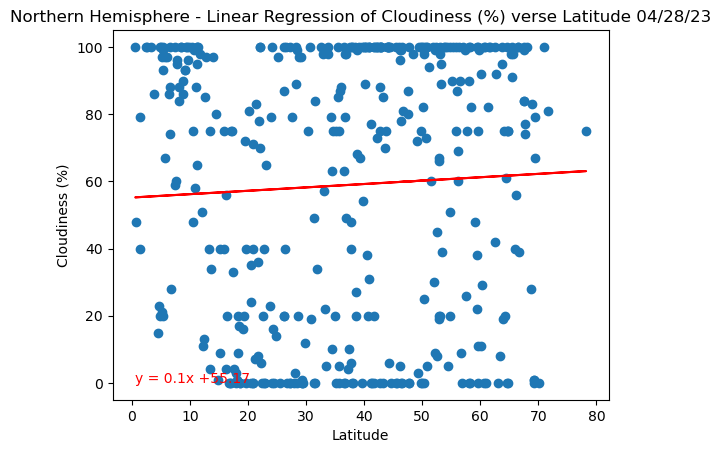

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (x_values.min(), y_values.min()))


plt.show()

 The rvalue is: 0.03704


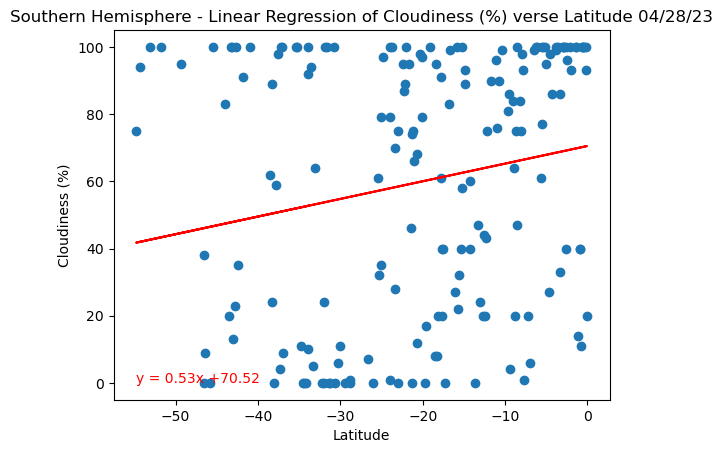

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (x_values.min(), y_values.min()))


plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 0.00029


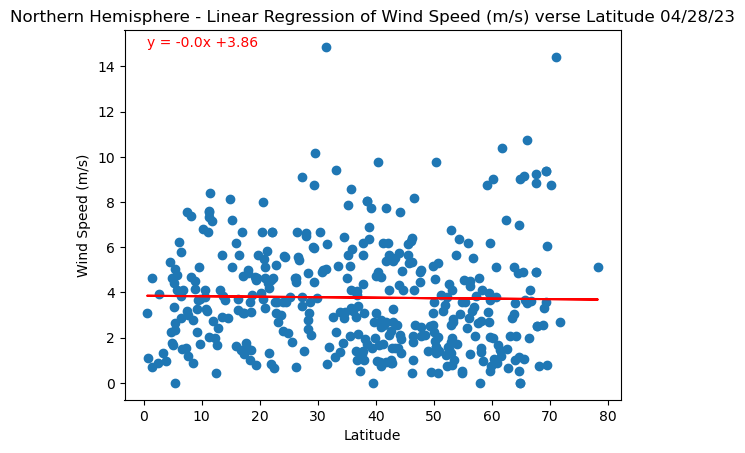

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern", (x_values.min(), y_values.max()))


plt.show()

 The rvalue is: 0.00029


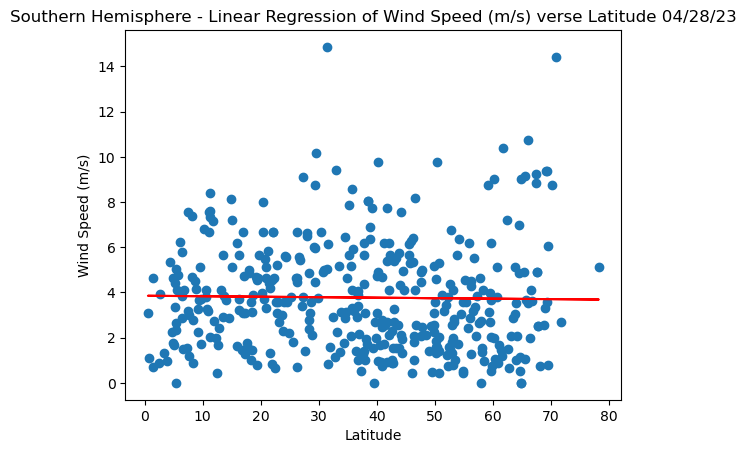

In [28]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern", (x_vaules.min(), y_values.min()))


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE